In [2]:
# load a coffea file
from coffea.util import load
import os
import awkward as ak
import numpy as np
import matplotlib.pyplot as plt
import mplhep as hep
import matplotlib
import re
matplotlib.rcParams["figure.dpi"] = 300


# Load file

In [3]:
# input = "/work/rcereghetti/out_vbfhh4b/output_vbf_matching5/output_all.coffea"
# o = load(f"{input}")
input = "/work/rcereghetti/out_vbfhh4b/out_test/output_all.coffea"
o = load(f"{input}")

# Function to extract the cut string

In [4]:
def remove_if_found(word, substring):
    if substring in word:
        return word.replace(substring, '')
    return word  # Restituisce la parola invariata se la sottostringa non è trovata

# Create a dictionary with number of events for every step and region

In [5]:
cuts_dict = {}

pattern = r'^[^_]+_[^_]+_([^_]+)_region'

for k in o["cutflow"].keys():    
    if "VBFtight" in k and "VBFtight_region" not in k:
        a = remove_if_found(k, "4b_")
        b = remove_if_found(a, "_region")
        c = remove_if_found(b, "VBFtight_")
        string = c
    else: string = k
    for kk in o["cutflow"][k].keys():
        if isinstance(o['cutflow'][k][kk], int):
            cuts_dict[string] = o['cutflow'][k][kk]
        else:
            cuts_dict[string] = o['cutflow'][k][kk]['VBF_HHto4B']


# Print the efficiency 

In [6]:
cuts_list = list(cuts_dict)
print(cuts_list)

for i in range(4, len(cuts_list)):
    print(f"Efficiency for {cuts_list[i]} with respect to 4b_region: {cuts_dict[cuts_list[i]] / cuts_dict['4b_region']}")

['initial', 'skim', 'presel', '4b_region', 'njet_vbf', 'eta_product', 'mjj', 'pt', 'eta', 'btag']
Efficiency for njet_vbf with respect to 4b_region: 0.7366867873910128
Efficiency for eta_product with respect to 4b_region: 0.6937625754527162
Efficiency for mjj with respect to 4b_region: 0.6398390342052314
Efficiency for pt with respect to 4b_region: 0.7365526492287056
Efficiency for eta with respect to 4b_region: 0.7267605633802817
Efficiency for btag with respect to 4b_region: 0.6655935613682092


# Check signal efficiency 3rd and 4th jet

In [7]:
sample=list(o["columns"].keys())[0]
dataset=list(o["columns"][sample].keys())[0]
col={}
for i in range(len(o["columns"][sample][dataset].keys())):
    category = list(o["columns"][sample][dataset].keys())[i]
    col[list(o["columns"][sample][dataset].keys())[i]] = o["columns"][sample][dataset][category]


In [8]:
# index = col["4b_region"]["JetVBF_matched_index"].value
# tot = np.zeros(11)
# # print(tot)
# for i in range(len(index)):
#     tot[int(index[i])]+=1
# # for i in range(len(tot)):
# #     print(f"Index {i}: {tot[i]/len(index)}")
# print(np.sum(tot[6:]),len(index), np.sum(tot[6:])/len(index))
# plt.hist(index, 11)
# plt.grid()
# plt.show()

In [9]:
# regions = []
# for k in o["cutflow"].keys():
#     regions.append(k)

# for i in range(3, len(regions)):
#     index = col[regions[i]]["JetVBF_matched_index"].value
#     tot = np.zeros(11)
#     for j in range(len(index)):
#         tot[int(index[j])]+=1
#     print(f"{cuts_list[i]}: {np.sum(tot[6:])} {len(index)} {np.sum(tot[6:])/len(index)}")


[1. 0. 6. ... 6. 0. 0.]
Index 0: 2664.0
Index 1: 1902.0
Index 2: 1875.0
Index 3: 1910.0
Index 4: 1908.0
Index 5: 1728.0
Index 6: 600.0
Index 7: 176.0
Index 8: 50.0
Index 9: 16.0
Index 10: 3.0
Index 11: 1.0
[2.664e+03 1.902e+03 1.875e+03 1.910e+03 1.908e+03 1.728e+03 6.000e+02
 1.760e+02 5.000e+01 1.600e+01 3.000e+00 1.000e+00]
846.0 12833 0.06592379022831762


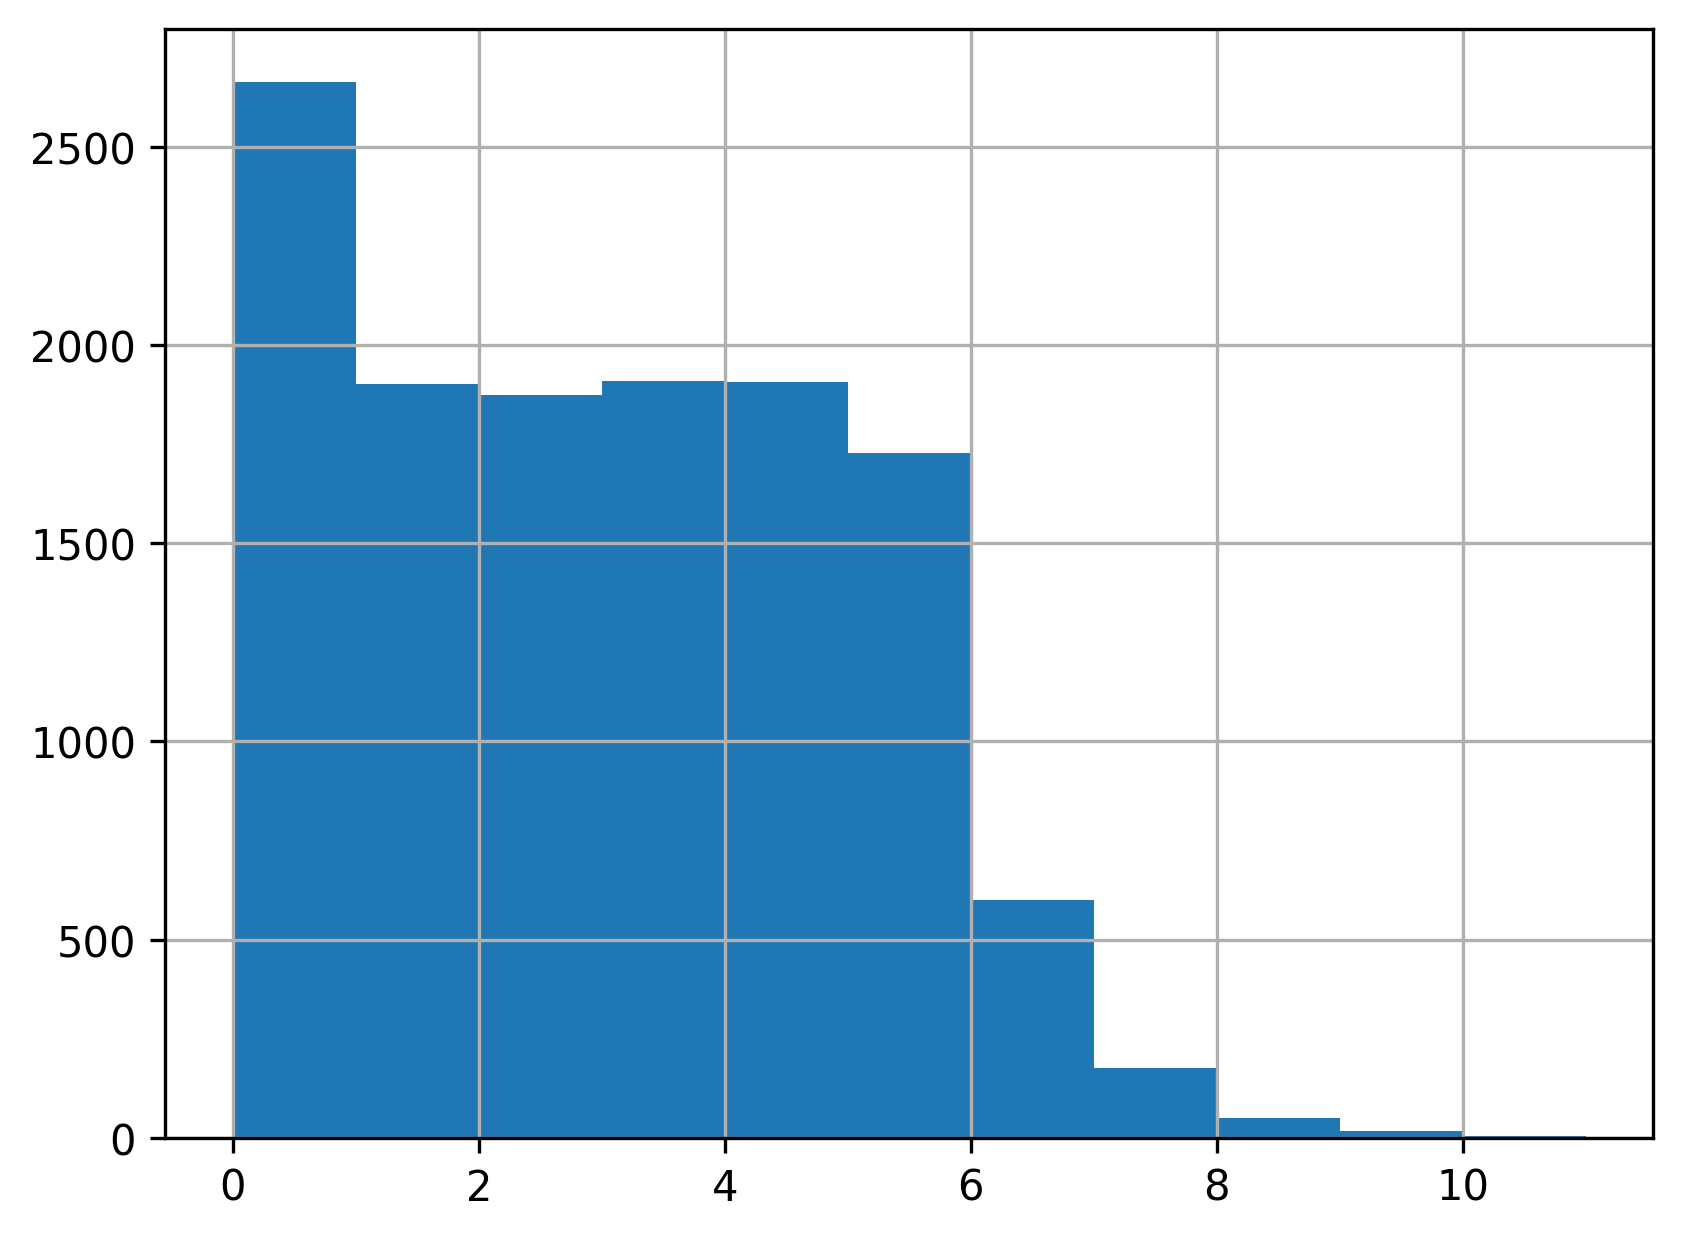

12833
12833


In [10]:
index = col["4b_region"]["JetVBF_matched_index"].value
print(index)
# sum = 0
# for i in range(len(index)):
#     if index[i] == -999: sum+=1
# print(sum)
tot = np.zeros(12)
for i in range(len(index)):
    if index[i] >= 0:
        tot[int(index[i])]+=1
for i in range(len(tot)):
    print(f"Index {i}: {tot[i]}") #/len(index))
print(tot)
print(np.sum(tot[6:]),len(index), np.sum(tot[6:])/len(index))

index_array = np.array(index)
index_not_none = index_array[index_array >= 0]

plt.hist(index_not_none, 11)
plt.grid()
plt.show()
print(len(index))
print(len(index_not_none))

In [11]:
jetBtag = col["4b_region"]["JetVBF_matched_btagPNetB"].value
nJetVBF = col["4b_region"]["events_nJetVBF_matched"].value
jetBtag_unflatten = ak.unflatten(jetBtag, nJetVBF)
print(ak.sum(nJetVBF) / (2 * len(nJetVBF)))
print(jetBtag_unflatten)
mask_two = nJetVBF == 2
print(ak.sum(mask_two) / len(nJetVBF))
mask_one = nJetVBF == 1
print(ak.sum(mask_one) / len(nJetVBF))
mask_zero = nJetVBF == 0
print(ak.sum(mask_zero) / len(nJetVBF))
weight = col["4b_region"]["weight"].value
mask_negative = weight < 0
print(weight[mask_negative])
mask_not_none = jetBtag > -2
mask_medium = jetBtag >0.2605
# print(len(jetBtag[mask_medium]) /len(jetBtag[mask_not_none]))
# plt.hist(jetBtag)

0.8606975184439973
[[0.0449], [0.0208, -1], [0.119, 0.00871], ... [0.00124, -1], [0.00159], [0.579]]
0.7366867873910128
0.24802146210596915
0.015291750503018108
[]


In [12]:
FromHiggs_pt = col["4b_VBFtight_njet_vbf_region"]["JetGoodFromHiggsOrdered_pt"].value
# print(FromHiggs_pt)
VBF_pt = col["4b_VBFtight_njet_vbf_region"]["JetVBFLeadingPtNotFromHiggs_pt"].value
print(VBF_pt)

[170.54393   21.140991 130.32283  ... 160.3455   346.12814   38.199215]


In [13]:
VBFnotLeadingPtFromHiggs_index = col["4b_VBFtight_njet_vbf_region"]["JetVBFLeadingPtNotFromHiggs_index"].value
VBFnotFromHiggs_index = col["4b_VBFtight_njet_vbf_region"]["JetVBFNotFromHiggs_index"].value
stop = 8
FromHiggs_index = col["4b_VBFtight_njet_vbf_region"]["JetGoodFromHiggsOrdered_index"].value
VFBgeneralSelection_index = col["4b_VBFtight_njet_vbf_region"]["JetVBF_generalSelection_matched_index"].value
VFBgeneralSelection_index2 = col["4b_region"]["JetVBF_generalSelection_matched_index"].value

# print(np.reshape(VFBgeneralSelection_index, (-1, 2))[0:stop])
# print(np.reshape(VBFnotLeadingPtFromHiggs_index, (-1, 2))[0:stop])
# # print(np.reshape(VBF_index[0:stop], (-1,2)))
print(FromHiggs_index[0:stop])
print(VBFnotFromHiggs_index[0:stop + 2])
print(VBFnotLeadingPtFromHiggs_index[0:stop])
print(VFBgeneralSelection_index[0:stop])
print(VFBgeneralSelection_index2[0:stop])
print()

[[2 4 1 3]
 [1 3 6 7]
 [1 3 2 6]
 [0 4 2 5]
 [2 1 3 5]
 [0 3 2 4]
 [0 4 1 5]
 [0 5 1 4]]
[0 5 6 0 2 5 4 8 0 4]
[0 5 0 2 0 4 1 3]
[0. 6. 0. 2. 4. 5. 1. 3.]
[1. 0. 6. 0. 2. 4. 3. 0.]



# VBF matching efficiency

In [25]:
VBFnotLeadingPtFromHiggs_index = col["4b_region"]["JetVBFLeadingPtNotFromHiggs_index"].value
VFBgeneralSelection_index = col["4b_region"]["JetVBF_generalSelection_matched_index"].value
VBF_matched_index = col["4b_region"]["JetVBF_matched_index"].value
Jet_index = col["4b_region"]["Jet_index"].value
Jet_N = col["4b_region"]["Jet_N"].value

print("Matching efficinecy in 4b_region:", "\n")
print("VBF_matched:", len(VBF_matched_index) / (2 * cuts_dict["4b_region"]))
print("VBF_generalSelection_matched:", len(VFBgeneralSelection_index) / (2*len(Jet_N)))
print("VBFLeadingPtnotFromHiggs:", len(VBFnotLeadingPtFromHiggs_index) / (2*len(Jet_N)))
print(len(Jet_N))
print(cuts_dict["4b_region"])

Matching efficinecy in 4b_region: 

VBF_matched: 0.8606975184439973
VBF_generalSelection_matched: 0.8511066398390342
VBFLeadingPtnotFromHiggs: 1.0
7455
7455


In [15]:
VFBgeneralSelection_index = col["4b_VBFtight_njet_vbf_region"]["JetVBF_generalSelection_matched_index"].value
VBF_matched_index = col["4b_VBFtight_njet_vbf_region"]["JetVBF_matched_index"].value
Jet_index = col["4b_VBFtight_njet_vbf_region"]["Jet_index"].value

print("Matching efficinecy in 4b_VBFtight_njet_vbf_region:", "\n")
print("VBF_matched:", len(VBF_matched_index) / len(Jet_index))
print("VBF_generalSelection_matched:", len(VFBgeneralSelection_index) / len(Jet_index))
print("VBFLeadingPtnotFromHiggs:", len(VBFnotLeadingPtFromHiggs_index) / len(Jet_index))

Matching efficinecy in 4b_VBFtight_njet_vbf_region: 

VBF_matched: 0.27022904519398727
VBF_generalSelection_matched: 0.2669815730558221
VBFLeadingPtnotFromHiggs: 0.27022904519398727


In [16]:
VBFnotFromHiggs_eta = col["4b_region"]["events_JetVBFLeadingPtNotFromHiggs_deltaEta"].value
print(VBFnotFromHiggs_eta)
# print(len(VBFnotFromHiggs_eta[0::2]))
# print(len(VBFnotFromHiggs_eta[1::2]))
# print(abs(VBFnotFromHiggs_eta[0::2]-VBFnotFromHiggs_eta[1::2]))

[4.7905273 4.6987305 3.9665527 ... 2.9509277 1.0402164 7.2128906]
